In [2]:
import pandas as pd

### 1.获得上市公司归属地

#### 1.1读取上市公司数据

In [9]:
company_list =  pd.read_csv(r'../../file/subject/chapter3/SSGScompany.csv',names=['ID','Name','Address','url','pages'])

In [11]:
company_list.tail()

,ID,Name,Address,url,pages
3529,3530,南京越博动力系统股份有限公司,企业地址：南京市建邺区嘉陵江东街18号4栋4楼,/orgcompany/searchitemdtl/6cf9cb58f783b59e4457...,1
3530,3531,杭州天地数码科技股份有限公司,企业地址：杭州钱江经济开发区康信路600号,/orgcompany/searchitemdtl/0ff919445c382c1f33ad...,1
3531,3532,深圳欣锐科技股份有限公司,企业地址：深圳市南山区学苑大道1001号南山智园C1栋14楼,/orgcompany/searchitemdtl/6d3df055aef8859dada9...,1
3532,3533,汉嘉设计集团股份有限公司,企业地址：杭州市湖墅南路501号迪尚商务大厦,/orgcompany/searchitemdtl/cbc28a3a83146956f507...,2
3533,3534,宁德时代新能源科技股份有限公司,企业地址：福建省宁德市蕉城区漳湾镇新港路2号,/orgcompany/searchitemdtl/1541cedafeb62053ca97...,2


In [13]:
company_list.Address = company_list.Address.apply(lambda x:x[5:])

In [14]:
company_list.head()

,ID,Name,Address,url,pages
0,0,海南天然橡胶产业集团股份有限公司,海口市滨海大道103号财富广场四层,/orgcompany/searchitemdtl/8154f8c625f81d56a318...,3
1,1,河北福成五丰食品股份有限公司,河北省廊坊市三河市燕郊经济技术开发区,/orgcompany/searchitemdtl/cb0ececa43750d7de477...,1
2,2,新疆赛里木现代农业股份有限公司,新疆博州博乐市红星路158号,/orgcompany/searchitemdtl/397fdda9032c26af1fed...,3
3,3,甘肃省敦煌种业集团股份有限公司,甘肃省酒泉市肃州区肃州路28号,/orgcompany/searchitemdtl/c30c2ded63cac5ce6db3...,1
4,4,大湖水殖股份有限公司,湖南省常德市武陵区丹阳街道建民巷社区建设东路348号,/orgcompany/searchitemdtl/8be72aa7f34e615d57c2...,3


#### 1.2通过地址获取归属地

In [17]:
import requests
import json
import re

def company_region(address):
    try:
        url = 'http://api.map.baidu.com/geocoding/v3/?address=' + address + \
'&output=json&ak=VYt6ipe4cG9t1CpURQr58ulXep2pcpY6&callback=showLocation'
        data = requests.get(url).text
        js = re.match('.*?\((.*?)\).*?',data).group(1)
        js = json.loads(js)['result']['location']

        url = 'http://api.map.baidu.com/reverse_geocoding/v3/\
?ak=VYt6ipe4cG9t1CpURQr58ulXep2pcpY6&output=json&coordtype=wgs84ll&location={},{}'.format(js['lat'],js['lng'])
        data = requests.get(url).text
        data = json.loads(data)
        ls = []
        ls.append(data['result']['addressComponent']['province'])
        ls.append(data['result']['addressComponent']['city'])
        ls.append(data['result']['addressComponent']['district'])
        return ls

    except:
        print(x,'error')
        return ''

In [18]:
company_region('新疆博州博乐市红星路158号')

['新疆维吾尔自治区', '博尔塔拉蒙古自治州', '博乐市']

In [ ]:
company_list['region'] = company_list.Address.apply(company_regionpany)

In [ ]:
company_list.to_excel(r'../../file/subject/chapter3/SSGScompany02.xlsx',sheet_name='Sheet1')

#### 1.3有部分无法获取，人工判断归属地

In [23]:
company_list = pd.read_excel(r'../../file/subject/chapter3/SSGScompany03.xlsx',sheet_name='Sheet1')

In [24]:
company_list.head()

,Unnamed: 0,公司名称,地址,公司网址,爬取页,公司名称2,region
0,1781,安徽华茂纺织股份有限公司,安徽省安庆市纺织南路80号,/orgcompany/searchitemdtl/5bc2e76fd05b73a3139c...,4,安徽华茂纺织股份有限公司,"['安徽省', '安庆市', '大观区']"
1,685,安徽集友新材料股份有限公司,安徽省安庆市太湖经济开发区,/orgcompany/searchitemdtl/4567279c7b3bd37ec9bf...,1,安徽集友新材料股份有限公司,"['安徽省', '安庆市', '太湖县']"
2,2895,安徽盛运环保（集团）股份有限公司,安徽省桐城经济开发区新东环路,/orgcompany/searchitemdtl/4145c0d56de28c9ac197...,8,安徽盛运环保(集团)股份有限公司,"['安徽省', '安庆市', '桐城市']"
3,934,安徽水利开发股份有限公司,安徽省蚌埠市东海大道张公山路南侧,/orgcompany/searchitemdtl/dac6dae3e5b007ff3c6b...,8,安徽水利开发股份有限公司,"['安徽省', '蚌埠市', '龙子湖区']"
4,95,凯盛科技股份有限公司,安徽蚌埠市黄山大道8009号,/orgcompany/searchitemdtl/06e170bfa15177e399ca...,1,凯盛科技股份有限公司,"['安徽省', '蚌埠市', '禹会区']"


### 2.生成省、市数据

#### 2.1判断现有数据类型

In [28]:
company_list.iloc[1,-1]

"['安徽省', '安庆市', '太湖县']"

In [29]:
type(company_list.iloc[1,-1])

str

#### 2.2将字符串转换为列表

In [30]:
re.findall('\'(.*?)\'',company_list.iloc[1,-1])

['安徽省', '安庆市', '太湖县']

In [31]:
company_list.region = company_list.region.apply(lambda x:re.findall('\'(.*?)\'',x))

In [33]:
type(company_list.iloc[1,-1])

list

#### 2.3生成省、市列

In [35]:
company_list['province'] = company_list.region.apply(lambda x:x[0])

In [36]:
company_list['city'] = company_list.region.apply(lambda x:x[1])

In [37]:
company_list.head()

,Unnamed: 0,公司名称,地址,公司网址,爬取页,公司名称2,region,province,city
0,1781,安徽华茂纺织股份有限公司,安徽省安庆市纺织南路80号,/orgcompany/searchitemdtl/5bc2e76fd05b73a3139c...,4,安徽华茂纺织股份有限公司,"[安徽省, 安庆市, 大观区]",安徽省,安庆市
1,685,安徽集友新材料股份有限公司,安徽省安庆市太湖经济开发区,/orgcompany/searchitemdtl/4567279c7b3bd37ec9bf...,1,安徽集友新材料股份有限公司,"[安徽省, 安庆市, 太湖县]",安徽省,安庆市
2,2895,安徽盛运环保（集团）股份有限公司,安徽省桐城经济开发区新东环路,/orgcompany/searchitemdtl/4145c0d56de28c9ac197...,8,安徽盛运环保(集团)股份有限公司,"[安徽省, 安庆市, 桐城市]",安徽省,安庆市
3,934,安徽水利开发股份有限公司,安徽省蚌埠市东海大道张公山路南侧,/orgcompany/searchitemdtl/dac6dae3e5b007ff3c6b...,8,安徽水利开发股份有限公司,"[安徽省, 蚌埠市, 龙子湖区]",安徽省,蚌埠市
4,95,凯盛科技股份有限公司,安徽蚌埠市黄山大道8009号,/orgcompany/searchitemdtl/06e170bfa15177e399ca...,1,凯盛科技股份有限公司,"[安徽省, 蚌埠市, 禹会区]",安徽省,蚌埠市


#### 2.4保存文件

In [38]:
company_list.to_excel(r'../../file/subject/chapter3/SSGScompany04.xlsx',sheet_name='Sheet1')

### 3.上市公司数量分布

#### 3.1聚合各省上市公司数量

In [3]:
company_ssgs =  pd.read_excel(r'../../file/subject/chapter3/SSGScompany04.xlsx',sheet_name='Sheet1')

In [4]:
company_ssgs.groupby(by='province').count()['公司名称'].sort_values(ascending=False).head()

province
广东省    568
浙江省    425
江苏省    386
北京市    306
上海市    284
Name: 公司名称, dtype: int64

In [5]:
SSGS = company_ssgs.groupby(by='province').count()['公司名称'].sort_values(ascending=False)

In [6]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['font.sans-serif']=['SimHei']#显示中文字体为黑体
plt.rcParams['axes.unicode_minus']=False#显示负号

%matplotlib inline

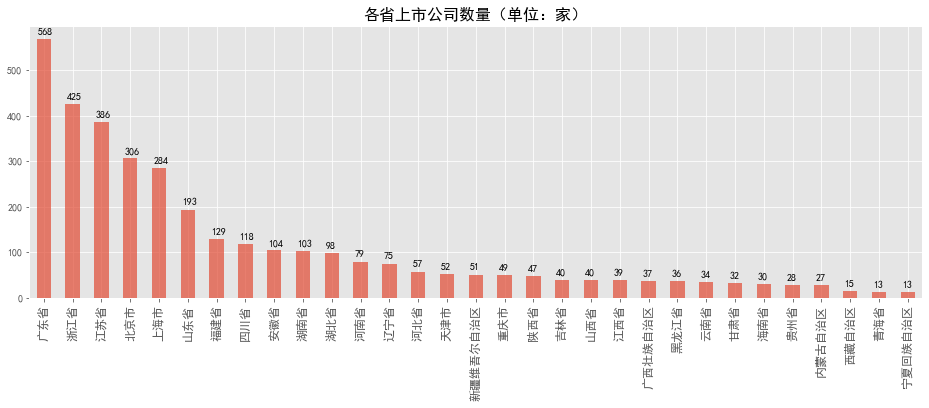

In [12]:
SSGS.plot(kind='bar',figsize=(16,5),alpha=0.7)
plt.xlabel('')
plt.title('各省上市公司数量（单位：家）',size=16)
plt.xticks(size=12)
for i in range(31):
    plt.text(i-0.2,SSGS[i]+10,SSGS[i])
plt.show()

#### 3.2聚合各市上市公司数量

In [100]:
SSGS_ct30 = company_ssgs.groupby(by='city').count()['公司名称'].sort_values(ascending=False).head(30)

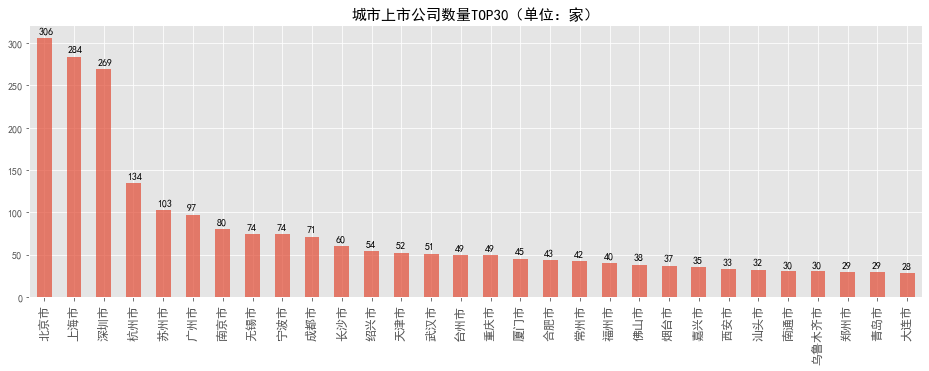

In [101]:
SSGS_ct30.plot(kind='bar',figsize=(16,5),alpha=0.7)
plt.xlabel('')
plt.title('城市上市公司数量TOP30（单位：家）',size=15)
plt.xticks(size=12)
for i in range(30):
    plt.text(i-0.2,SSGS_ct[i]+5,SSGS_ct[i])
plt.show()

#### 3.3城市群上市公司数量分布

In [32]:
def reg(x):
    if x in ['上海市','江苏省','浙江省']:
        return '长三角'
    if x in ['广东省']:
        return '珠三角'
    if x in ['北京市','天津市','河北省']:
        return '京津冀'
    if x in ['四川省','重庆市']:
        return '成渝'
    if x in ['湖北省','湖南省','江西省']:
        return '长江中游'
    if x in ['山东省']:
        return '山东半岛'
    else:
        return '其他'

In [34]:
company_ssgs['city_group'] = company_ssgs.province.apply(reg)

In [40]:
company_ssgs.groupby(by='city_group').count()['公司名称'].sort_values(ascending=False)

city_group
长三角     1095
其他       830
珠三角      568
京津冀      415
长江中游     240
山东半岛     193
成渝       167
Name: 公司名称, dtype: int64

In [41]:
SSGS_ctg = company_ssgs.groupby(by='city_group').count()['公司名称'].sort_values(ascending=False)

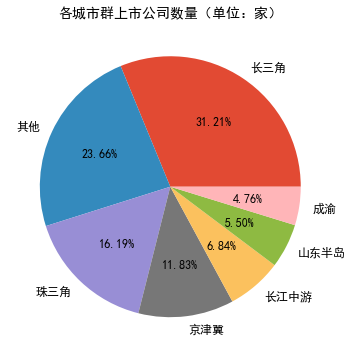

In [81]:
SSGS_ctg.plot(kind='pie',figsize=(6,6),autopct='%1.2f%%',fontsize=12)
plt.title('各城市群上市公司数量（单位：家）',size=14)
plt.ylabel('')
plt.show()

#### 3.4城市上市公司空间分布
将数据导入ArcGIS进行分析

In [102]:
SSGS_ct = company_ssgs.groupby(by='city').count()['公司名称'].sort_values(ascending=False)

In [103]:
df = pd.DataFrame(SSGS_ct).reset_index()

In [104]:
#去除数据两边的空格
df.city = df.city.str.strip()

In [105]:
df.to_csv(r'../../file/subject/chapter3/spatial.csv')